In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [541]:
pd.set_option('display.max_columns', None)

In [543]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [545]:
df.shape

(3554, 18)

In [547]:
df.head(5)

,sector,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
0,sector 95,flat,the roselia 2,0.45,6475.0,2,2,2,19.0,New Property,695.0,0,0,0,0,0,1,0
1,sector 78,flat,umang monsoon breeze,1.20,6494.0,3,3,2,8.0,Moderately New Property,2045.0,0,0,0,1,0,2,8
2,manesar,flat,hsiidc sidco aravali,0.91,3516.0,3,3,3+,8.0,Moderately New Property,1900.0,1,0,0,0,0,1,23
3,sector 108,flat,sobha city,3.35,13267.0,3,4,2,19.0,New Property,2525.0,0,0,0,0,0,1,102
4,sector 108,flat,sobha city,1.90,13758.0,2,2,2,8.0,Relatively new property,1250.0,0,0,0,0,0,1,85


In [549]:
train_df = df.drop(columns = ["society","price_per_sqft"])

In [553]:
train_df.sample(3)

,sector,property_type,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
3044,sector 69,flat,1.75,4,4,1,12.0,Relatively new property,1783.0,0,0,0,0,0,1,86
2504,sector 85,flat,0.90,4,4,3,8.0,Moderately New Property,1575.0,0,0,0,0,0,0,40
1611,sector 65,flat,2.80,3,3,0,14.0,Relatively new property,1828.0,0,0,0,0,0,1,39


## luxury score

In [556]:
train_df.columns

Index(['sector', 'property_type', 'price', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'agePossession', 'built_up_area', 'servant room',
       'study room', 'others', 'pooja room', 'store room', 'furnishing_type',
       'luxury_score'],
      dtype='object')

<Axes: xlabel='luxury_score'>

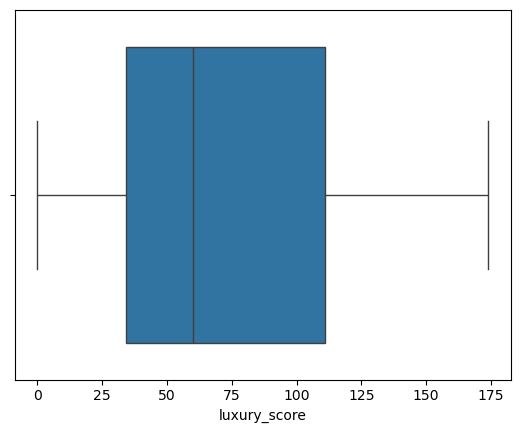

In [558]:
sns.boxplot(x=train_df["luxury_score"])

In [559]:
def luxury_categorize(score):
    if  0 <= score <50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score < 175:
        return "High"
    else:
        return None

In [562]:
train_df["luxury_score"] = train_df["luxury_score"].apply(luxury_categorize)

In [564]:
train_df["luxury_score"].value_counts()

luxury_score
Low       1594
Medium    1465
High       495
Name: count, dtype: int64

## floorNum

<Axes: xlabel='floorNum'>

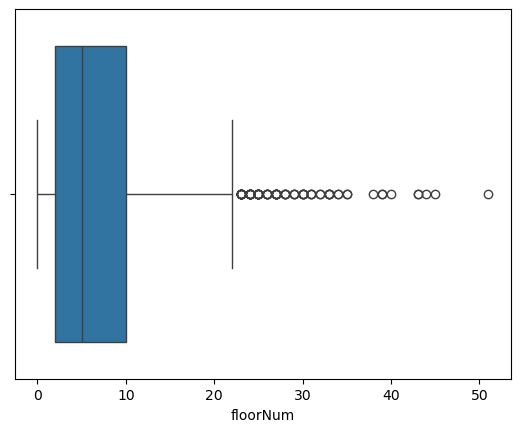

In [567]:
sns.boxplot(x=train_df["floorNum"])

In [569]:
def floorNum_categorize(value):
    if 0 <= value <=2:
        return "Low floor"
    elif 3 <= value <= 10:
        return "Mid floor"
    elif 11 <= value <= 51:
        return "High floor"
    else:
        return None

In [571]:
train_df["floorNum"] = train_df["floorNum"].apply(floorNum_categorize)

In [573]:
train_df["floorNum"].value_counts()

floorNum
Mid floor     1797
Low floor      953
High floor     804
Name: count, dtype: int64

In [575]:
df.columns

Index(['sector', 'property_type', 'society', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'servant room', 'study room', 'others', 'pooja room',
       'store room', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [577]:
train_df.rename(columns = {"luxury_score" : "luxury_category" , "floorNum" : "floor_category"},inplace =True)

In [579]:
train_df.head(5)

,sector,property_type,price,bedRoom,bathroom,balcony,floor_category,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_category
0,sector 95,flat,0.45,2,2,2,High floor,New Property,695.0,0,0,0,0,0,1,Low
1,sector 78,flat,1.20,3,3,2,Mid floor,Moderately New Property,2045.0,0,0,0,1,0,2,Low
2,manesar,flat,0.91,3,3,3+,Mid floor,Moderately New Property,1900.0,1,0,0,0,0,1,Low
3,sector 108,flat,3.35,3,4,2,High floor,New Property,2525.0,0,0,0,0,0,1,Medium
4,sector 108,flat,1.90,2,2,2,Mid floor,Relatively new property,1250.0,0,0,0,0,0,1,Medium


In [467]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

cat_column = data_label_encoded.select_dtypes(include = ["object"]).columns

# Apply label encoding to categorical columns
for col in cat_column:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)


[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56', 'sector 57

In [469]:
# Splitting the dataset into training and testing sets

x_label = data_label_encoded.drop(columns= ["price"])
y_label = data_label_encoded["price"]

In [471]:
x_label

,sector,property_type,bedRoom,bathroom,balcony,floor_category,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_category
0,108.0,0.0,2,2,2.0,0.0,1.0,695.0,0,0,0,0,0,1,1.0
1,89.0,0.0,3,3,2.0,2.0,0.0,2045.0,0,0,0,1,0,2,1.0
2,2.0,0.0,3,3,4.0,2.0,0.0,1900.0,1,0,0,0,0,1,1.0
3,11.0,0.0,3,4,2.0,0.0,1.0,2525.0,0,0,0,0,0,1,2.0
4,11.0,0.0,2,2,2.0,2.0,3.0,1250.0,0,0,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,5.0,0.0,3,3,2.0,2.0,3.0,1493.0,1,0,0,0,0,1,0.0
3550,87.0,0.0,2,2,2.0,0.0,4.0,665.0,0,0,0,0,0,1,2.0
3551,74.0,0.0,3,3,2.0,0.0,0.0,4278.0,0,0,0,0,1,1,2.0
3552,99.0,0.0,3,3,1.0,0.0,3.0,1746.0,0,0,0,1,0,1,2.0


In [473]:
y_label

0       0.45
1       1.20
2       0.91
3       3.35
4       1.90
        ... 
3549    1.45
3550    0.75
3551    7.00
3552    1.60
3553    1.51
Name: price, Length: 3554, dtype: float64

## Technique 1 - Correlation Analysis

<Axes: >

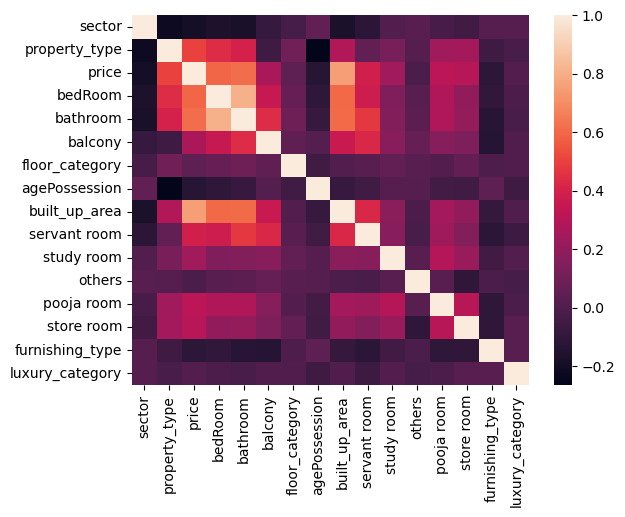

In [476]:
sns.heatmap(data_label_encoded.corr())

In [477]:
fi_df1 = data_label_encoded.corr()[['price']].reset_index().rename(columns = {"index" : "feature"}).sort_values(by = 'price',ascending = False)
fi_df1

,feature,price
2,price,1.000000
8,built_up_area,0.748572
4,bathroom,0.609777
3,bedRoom,0.591289
1,property_type,0.503728
9,servant room,0.391930
12,pooja room,0.319852
13,store room,0.305677
5,balcony,0.269637
10,study room,0.242955


## Technique 2 - Random Forest Feature Importance

In [481]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(x_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': x_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
7,built_up_area,0.649828
0,sector,0.104170
1,property_type,0.104139
2,bedRoom,0.024641
3,bathroom,0.023149
8,servant room,0.018379
6,agePossession,0.014665
4,balcony,0.012349
13,furnishing_type,0.009522
9,study room,0.009411


## Technique 3 - Gradient Boosting Feature importances

In [512]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(x_label,y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    "feature" : x_label.columns,
    "gb_importances" : gb_label.feature_importances_
}).sort_values(by = "gb_importances", ascending = False)
fi_df3

,feature,gb_importances
7,built_up_area,0.682369
0,sector,0.103180
1,property_type,0.095862
2,bedRoom,0.037498
3,bathroom,0.035424
8,servant room,0.022417
12,store room,0.010124
6,agePossession,0.004963
9,study room,0.002888
4,balcony,0.002081


## Technique 4 - Permutation Importance

In [485]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(x_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': x_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
7,built_up_area,0.740350
1,property_type,0.166867
0,sector,0.135790
2,bedRoom,0.047692
8,servant room,0.025945
3,bathroom,0.016852
9,study room,0.005601
12,store room,0.004861
4,balcony,0.004853
6,agePossession,0.003397


## Technique 5 - LASSO

In [488]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(x_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': x_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
7,built_up_area,1.509093
1,property_type,0.711301
3,bathroom,0.289838
12,store room,0.206990
8,servant room,0.181999
9,study room,0.179190
11,pooja room,0.085503
14,luxury_category,0.043472
2,bedRoom,0.020326
6,agePossession,-0.000000


## Technique 6 - RFE

In [491]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=x_label.shape[1], step=1)
selector_label = selector_label.fit(x_label, y_label)

# Get the selected features based on RFE
selected_features = x_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
7,built_up_area,0.650664
0,sector,0.104663
1,property_type,0.100810
2,bedRoom,0.026186
3,bathroom,0.025133
8,servant room,0.018333
6,agePossession,0.014096
4,balcony,0.012168
13,furnishing_type,0.010062
9,study room,0.008882


## Technique 7 - Linear Regression Weights

In [493]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': x_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
7,built_up_area,1.511510
1,property_type,0.709562
3,bathroom,0.297178
12,store room,0.211497
8,servant room,0.191738
9,study room,0.187994
11,pooja room,0.088852
14,luxury_category,0.054111
2,bedRoom,0.023499
6,agePossession,-0.003176


## Technique 8 - SHAP

In [495]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-4.26055671e-01, -1.77106329e-01, -4.35764790e-02, ...,
        -6.23361630e-03, -9.77375759e-03, -1.68870905e-03],
       [-4.76799361e-01, -2.97690366e-01, -2.41064291e-02, ...,
        -1.13018223e-02,  2.13024669e-01, -1.72846117e-02],
       [-6.45433974e-01, -4.84053944e-01, -5.05494768e-02, ...,
        -7.70935948e-03, -1.12438754e-02,  9.99750068e-05],
       ...,
       [ 9.25852807e-01, -9.39054506e-01, -1.19534073e-01, ...,
         1.13765320e-01, -1.57631021e-02,  2.90216768e-02],
       [-4.35225746e-01, -2.06475469e-01, -4.71449723e-03, ...,
        -6.09511011e-03, -2.16508312e-02,  5.24087384e-03],
       [ 4.31777081e-02, -3.46192934e-01, -1.25402323e-02, ...,
        -1.00669990e-02,  2.50914492e-03, -4.20173543e-03]])

In [496]:
fi_df8 = pd.DataFrame({
    'feature': x_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
7,built_up_area,1.249391
1,property_type,0.475639
0,sector,0.383518
3,bathroom,0.112632
8,servant room,0.090631
2,bedRoom,0.054379
4,balcony,0.039348
6,agePossession,0.026922
13,furnishing_type,0.026229
5,floor_category,0.021861


In [514]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')


In [516]:
final_fi_df

,price,rf_importance,gb_importances,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
built_up_area,0.748572,0.649828,0.682369,0.740350,1.509093,0.650664,1.511510,1.249391
bathroom,0.609777,0.023149,0.035424,0.016852,0.289838,0.025133,0.297178,0.112632
bedRoom,0.591289,0.024641,0.037498,0.047692,0.020326,0.026186,0.023499,0.054379
property_type,0.503728,0.104139,0.095862,0.166867,0.711301,0.100810,0.709562,0.475639
servant room,0.391930,0.018379,0.022417,0.025945,0.181999,0.018333,0.191738,0.090631
pooja room,0.319852,0.005490,0.000078,-0.002178,0.085503,0.004805,0.088852,0.010630
store room,0.305677,0.008657,0.010124,0.004861,0.206990,0.008211,0.211497,0.018639
balcony,0.269637,0.012349,0.002081,0.004853,-0.035374,0.012168,-0.058369,0.039348
study room,0.242955,0.009411,0.002888,0.005601,0.179190,0.008882,0.187994,0.021650


In [518]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [520]:
final_fi_df[['rf_importance','gb_importances','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.622529
property_type      0.126289
sector             0.115937
bedRoom            0.030176
bathroom           0.028479
servant room       0.023414
agePossession      0.009441
balcony            0.009241
store room         0.007700
study room         0.006901
furnishing_type    0.006399
floor_category     0.004773
luxury_category    0.004490
pooja room         0.002530
others             0.001701
dtype: float64

In [522]:
# to drop pooja room, study room, others
x_label

,sector,property_type,bedRoom,bathroom,balcony,floor_category,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_category
0,108.0,0.0,2,2,2.0,0.0,1.0,695.0,0,0,0,0,0,1,1.0
1,89.0,0.0,3,3,2.0,2.0,0.0,2045.0,0,0,0,1,0,2,1.0
2,2.0,0.0,3,3,4.0,2.0,0.0,1900.0,1,0,0,0,0,1,1.0
3,11.0,0.0,3,4,2.0,0.0,1.0,2525.0,0,0,0,0,0,1,2.0
4,11.0,0.0,2,2,2.0,2.0,3.0,1250.0,0,0,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,5.0,0.0,3,3,2.0,2.0,3.0,1493.0,1,0,0,0,0,1,0.0
3550,87.0,0.0,2,2,2.0,0.0,4.0,665.0,0,0,0,0,0,1,2.0
3551,74.0,0.0,3,3,2.0,0.0,0.0,4278.0,0,0,0,0,1,1,2.0
3552,99.0,0.0,3,3,1.0,0.0,3.0,1746.0,0,0,0,1,0,1,2.0


In [524]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label, y_label, cv=5, scoring='r2')

In [525]:
scores.mean()

0.8061992423361172

In [526]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [527]:
scores.mean()

0.8022671568041655

In [528]:
export_df = x_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [529]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [530]:
export_df

,sector,property_type,bedRoom,bathroom,balcony,floor_category,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,price
0,108.0,0.0,2,2,2.0,0.0,1.0,695.0,0,0,1,1.0,0.45
1,89.0,0.0,3,3,2.0,2.0,0.0,2045.0,0,0,2,1.0,1.20
2,2.0,0.0,3,3,4.0,2.0,0.0,1900.0,1,0,1,1.0,0.91
3,11.0,0.0,3,4,2.0,0.0,1.0,2525.0,0,0,1,2.0,3.35
4,11.0,0.0,2,2,2.0,2.0,3.0,1250.0,0,0,1,2.0,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,5.0,0.0,3,3,2.0,2.0,3.0,1493.0,1,0,1,0.0,1.45
3550,87.0,0.0,2,2,2.0,0.0,4.0,665.0,0,0,1,2.0,0.75
3551,74.0,0.0,3,3,2.0,0.0,0.0,4278.0,0,1,1,2.0,7.00
3552,99.0,0.0,3,3,1.0,0.0,3.0,1746.0,0,0,1,2.0,1.60


In [583]:
train_df = train_df.drop(columns=['pooja room', 'study room', 'others'])

In [585]:
train_df.to_csv('gurgaon_properties_post_feature_selection_v2.csv', index=False)
